# 線性迴歸證明

<img src='./線性迴歸.png' />

<img src='./線性迴歸證明.png' />

## 世界人口數預測

In [1]:
import numpy as np

In [2]:
year=[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020]
pop=[2.53, 2.57, 2.62, 2.67, 2.71, 2.76, 2.81, 2.86, 2.92, 2.97, 3.03,
       3.08, 3.14, 3.2 , 3.26, 3.33, 3.4 , 3.47, 3.54, 3.62, 3.69, 3.77,
       3.84, 3.92, 4.  , 4.07, 4.15, 4.22, 4.3 , 4.37, 4.45, 4.53, 4.61,
       4.69, 4.78, 4.86, 4.95, 5.05, 5.14, 5.23, 5.32, 5.41, 5.49, 5.58,
       5.66, 5.74, 5.82, 5.9 , 5.98, 6.05, 6.13, 6.2 , 6.28, 6.36, 6.44,
       6.51, 6.59, 6.67, 6.75, 6.83, 6.92, 7.  , 7.08, 7.16, 7.24, 7.32,
       7.4 , 7.48, 7.56, 7.64, 7.72]


In [3]:
X=np.array(year).reshape(-1, 1)
y=np.array(pop).reshape(-1, 1)
X.shape, y.shape

((71, 1), (71, 1))

In [4]:
# 設定 b 對應的 X，固定為 1
one=np.ones((X.shape[0], 1))
one.shape

(71, 1)

In [5]:
# X 結合 b 對應的 X
X=np.concatenate((X, one), axis=1)
X.shape

(71, 2)

In [6]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([[ 7.72102616e-02],
       [-1.48313919e+02]])

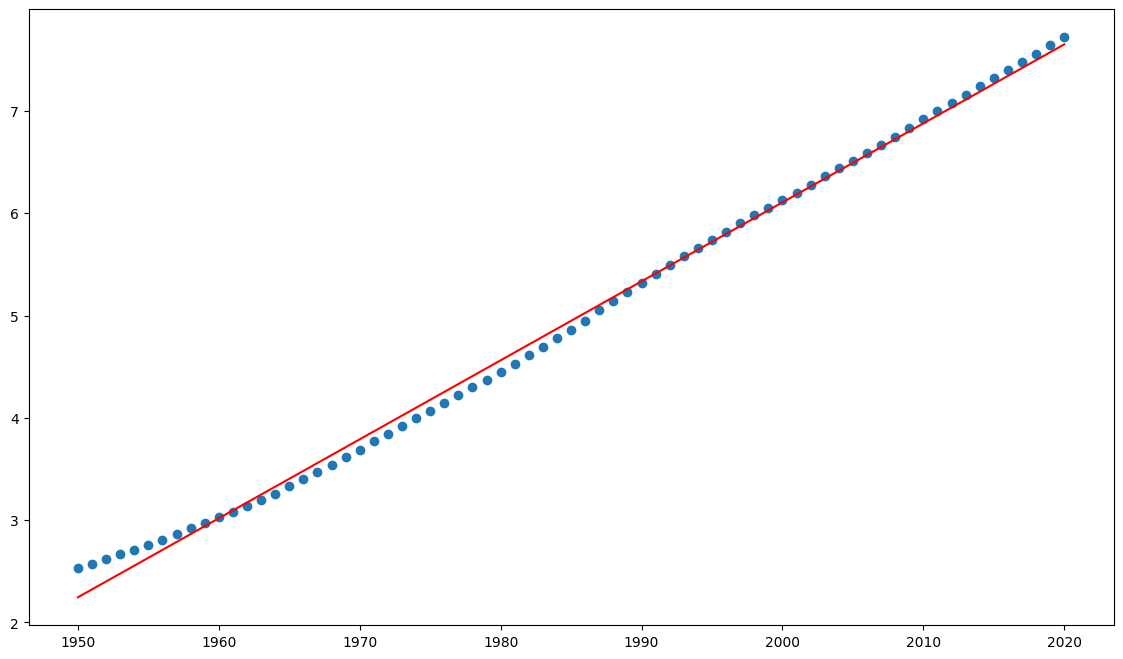

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.scatter(X[:, 0], y[:, 0])
plt.plot(X[:, 0], X[:, 0] * beta[0,0] + beta[1,0], 'r')

In [8]:
np.polyfit(year, pop, deg=1)

array([ 7.72102616e-02, -1.48313919e+02])

In [9]:
# 二次迴歸
beta2  = np.polyfit(year, pop, deg=2)
beta2

array([ 1.87071406e-04, -6.65463220e-01,  5.88710942e+02])

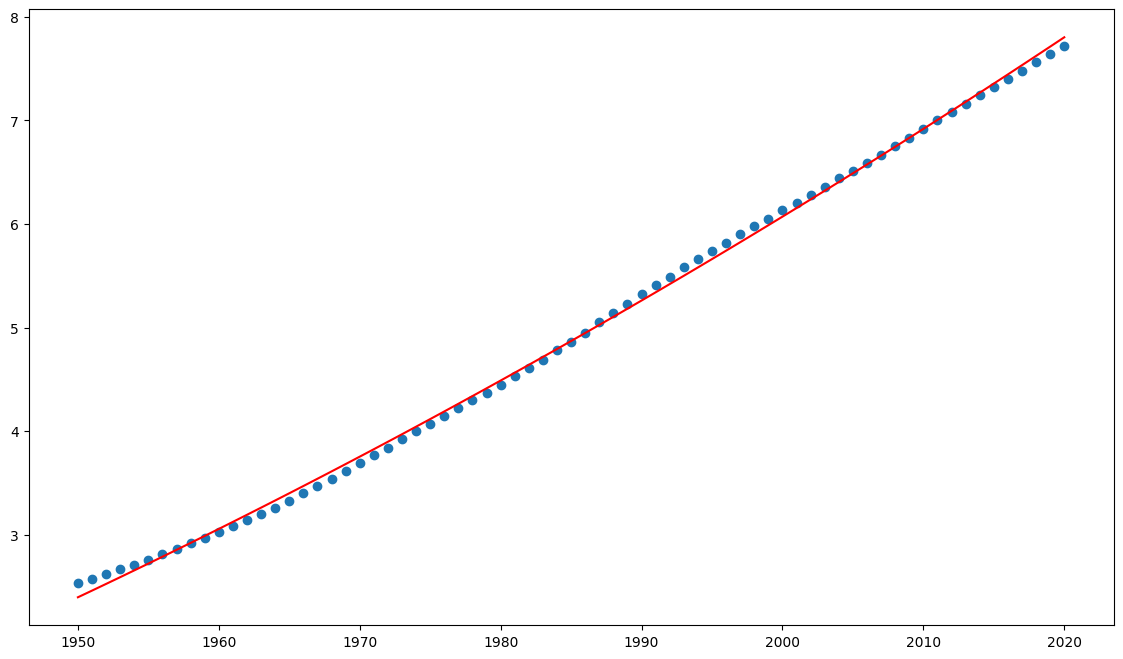

In [10]:
plt.figure(figsize=(14, 8))
plt.scatter(X[:, 0], y[:, 0])
plt.plot(X[:, 0], X[:, 0] ** 2 * beta2[0] + X[:, 0] * beta2[1] + beta2[2], 'r')

In [11]:
2050 * beta[0,0] + beta[1,0]

np.float64(9.967117706232585)

In [12]:
# use sklearn LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

X=np.array(year).reshape(-1, 1)
y=np.array(pop)
reg.fit(X, y)
print('y = {:.4f} * x + {:.4f}'.format(reg.coef_[0], reg.intercept_))

y = 0.0772 * x + -148.3139


# 使用線性代數作二次迴歸

In [13]:
X=np.array(year).reshape(-1, 1)

# 設定 b 對應的 X，固定為 1
one=np.ones((X.shape[0], 1))

X2 = X**2
# X 結合 b 對應的 X
X=np.concatenate((X2, X, one), axis=1)
X.shape

(71, 3)

In [14]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([ 1.87071407e-04, -6.65463224e-01,  5.88710946e+02])

## 計程車費預測

In [15]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head(10)

KeyboardInterrupt: 

## 線性迴歸

In [ ]:
# 線性迴歸
X=df[['total_bill']].values
y=df[['tip']].values
X.shape, y.shape

In [ ]:
# 設定 b 對應的 X，固定為 1
one=np.ones((X.shape[0], 1))
one.shape

In [ ]:
# X 結合 b 對應的 X
X=np.concatenate((X, one), axis=1)
X.shape

In [ ]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y[:, 0])
plt.plot(X[:, 0], X[:, 0] * beta[0,0] + beta[1,0], 'r')

In [ ]:
X=df['total_bill']
y=df['tip']
X.shape, y.shape

## 二次迴歸

In [ ]:
# 二次迴歸
beta2  = np.polyfit(X, y, deg=2)
beta2

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y)
plt.plot(X, X ** 2 * beta2[0] + X * beta2[1] + beta2[2], 'r')